In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Завантаження даних з файлу Excel
df = pd.read_csv("NationalNames.csv")

In [5]:
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [6]:

# Виведення імен стовпців
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [7]:
male_count = len(df[df['Gender'] == 'M']['Name'].unique())
female_count = len(df[df['Gender'] == 'F']['Name'].unique())

# Виведення результату
print("Кількість унікальних жіночих імен:", female_count)
print("Кількість унікальних чоловічих імен:", male_count)

Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [8]:
# Відфільтрувати дані за 2010 рік та чоловічу стать
male_names_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]

# Виведення результату
print("5 найпопулярніших чоловічих імен у 2010 році:")
print(male_names_2010.head(5))


5 найпопулярніших чоловічих імен у 2010 році:
              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


In [9]:
# Групуємо дані за роками і іменами, підраховуючи кількість входжень кожного імені в кожному році
popular_names_by_year = df.groupby(['Year', 'Name']).size().reset_index(name='Count')

# Знаходимо рядок з найбільшою кількістю входжень для кожного року
most_popular_names_by_year = popular_names_by_year.loc[popular_names_by_year.groupby('Year')['Count'].idxmax()]

# Виводимо результат
print("Найпопулярніше ім'я кожного року та кількість разів його входження:")
print(most_popular_names_by_year[['Year', 'Name', 'Count']])


Найпопулярніше ім'я кожного року та кількість разів його входження:
         Year     Name  Count
16       1880    Addie      2
1904     1881    Addie      2
3735     1882    Addie      2
5745     1883    Addie      2
7709     1884    Addie      2
...       ...      ...    ...
1509211  2010  Aaliyah      2
1540822  2011  Aalijah      2
1572201  2012     Aadi      2
1603437  2013     Aadi      2
1634260  2014  Aalijah      2

[135 rows x 3 columns]


In [10]:
# Вибір даних за 2008 рік
data_2008 = df[df['Year'] == 2008]

# Визначення кількості унікальних імен у 2008 році
unique_names_count = data_2008['Name'].nunique()

# Знаходження найпопулярнішого імені у 2008 році
most_popular_name = data_2008.groupby('Name')['Count'].sum().idxmax()

print("Кількість унікальних імен у 2008 році:", unique_names_count)
print("Найпопулярніше ім'я у 2008 році:", most_popular_name)

Кількість унікальних імен у 2008 році: 32488
Найпопулярніше ім'я у 2008 році: Jacob


In [11]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

# Групування даних за роком та підрахунок загальної кількості входжень
jacob_female_counts = jacob_female.groupby('Year')['Count'].sum()

# Знаходження року з найбільшою кількістю входжень імені "Jacob" серед жіночих імен
most_popular_year = jacob_female_counts.idxmax()
count = jacob_female_counts.max()

print(f"Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих імен: {most_popular_year}")
print(f"Кількість жіночих імен 'Jacob' у цьому році: {count}")

Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих імен: 2004
Кількість жіночих імен 'Jacob' у цьому році: 171


In [13]:
# Групування даних за рік та стать і підрахунок загальної кількості для кожного року
year_gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

# Знаходження року з найбільшою різницею між кількістю чоловічих та жіночих імен
year_gender_diff = abs(year_gender_counts['M'] - year_gender_counts['F'])
most_neutral_year = year_gender_diff.idxmin()
neutral_count = year_gender_diff.min()

print(f"Рік з найбільшою кількістю гендерно нейтральних імен: {most_neutral_year}")
print(f"Різниця між кількістю чоловічих та жіночих імен у цьому році: {neutral_count}")

Рік з найбільшою кількістю гендерно нейтральних імен: 1937
Різниця між кількістю чоловічих та жіночих імен у цьому році: 2437


In [15]:
# Групування даних за рік і підрахунок загальної кількості народжень для кожного року
births_per_year = df.groupby('Year')['Count'].sum()

print("Загальна кількість народжень за рік:")
print(births_per_year.head())

Загальна кількість народжень за рік:
Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


In [16]:
# Групування даних за рік і підрахунок загальної кількості народжень для кожного року
births_per_year = df.groupby('Year')['Count'].sum()

# Знаходження року з найбільшою загальною кількістю народжень
most_births_year = births_per_year.idxmax()
max_births = births_per_year.max()

print(f"Рік з найбільшою кількістю народжень: {most_births_year}")
print(f"Кількість народжень у цьому році: {max_births}")

Рік з найбільшою кількістю народжень: 1957
Кількість народжень у цьому році: 4200026


In [18]:
# Групування даних за рік та стать і підрахунок загальної кількості народжень для кожного року та статі
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum()

print("Кількість дівчаток та хлопчиків, які народились кожного року:")
print(births_per_year_gender.head())

Кількість дівчаток та хлопчиків, які народились кожного року:
Year  Gender
1880  F          90993
      M         110491
1881  F          91954
      M         100745
1882  F         107850
Name: Count, dtype: int64


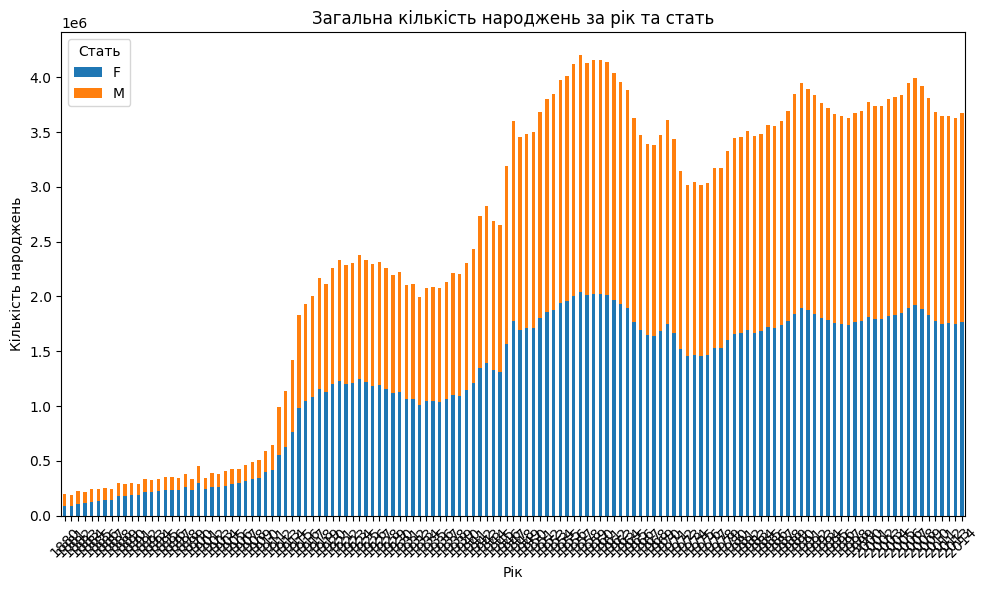

In [21]:
# Групування даних за рік та стать і підрахунок загальної кількості народжень для кожного року та статі
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Накреслення графіку
births_per_year_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Загальна кількість народжень за рік та стать')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend(title='Стать')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
name_counts = df.groupby(['Name', 'Gender'])['Count'].sum().unstack()

# Фільтрація імен, для яких є кількість народжень для обох статей
neutral_names = name_counts[name_counts['M'].notnull() & name_counts['F'].notnull()]

# Підрахунок кількості гендерно-нейтральних імен
neutral_names_count = len(neutral_names)

print("Кількість гендерно-нейтральних імен:", neutral_names_count)

Кількість гендерно-нейтральних імен: 10221


In [3]:
# Групування даних за ім'ям і підрахунок загальної кількості для кожного імені
name_counts = df.groupby('Name')['Count'].sum()

# Визначення непопулярних імен (ті, які використовувалися найменшу кількість разів)
unpopular_names = name_counts[name_counts == name_counts.min()]

# Вибір найпопулярнішого серед непопулярних імен
most_popular_unpopular_name = unpopular_names.idxmax()

print("Найпопулярніше серед непопулярних імен:", most_popular_unpopular_name)

Найпопулярніше серед непопулярних імен: Aabid


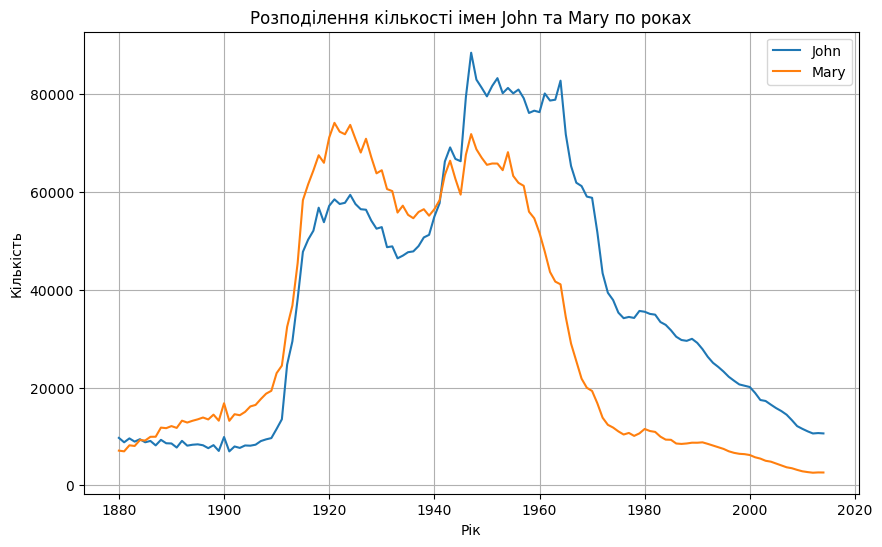

In [6]:
# Відфільтрування даних для імен "John" та "Mary"
john_data = df[df['Name'] == 'John']
mary_data = df[df['Name'] == 'Mary']
# Групування даних за роком і підрахунок загальної кількості для кожного року
john_counts = john_data.groupby('Year')['Count'].sum()
mary_counts = mary_data.groupby('Year')['Count'].sum()

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(john_counts.index, john_counts.values, label='John')
plt.plot(mary_counts.index, mary_counts.values, label='Mary')
plt.title('Розподілення кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()

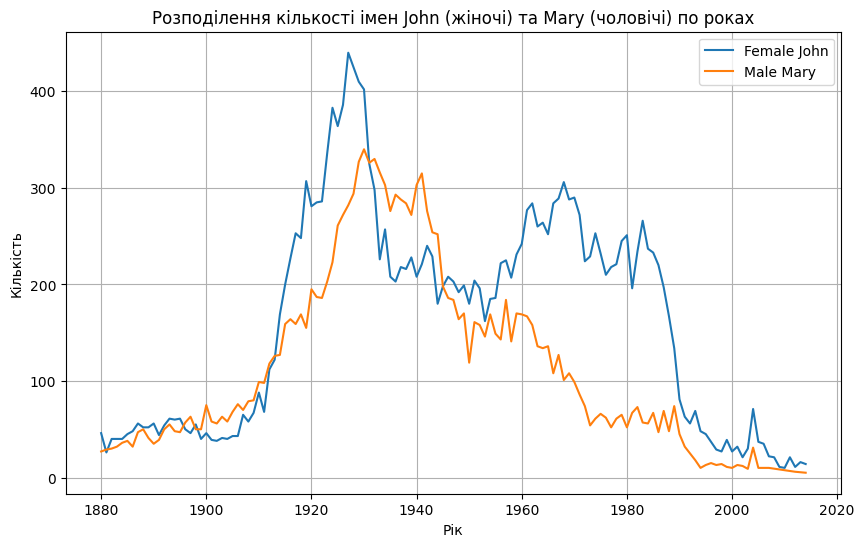

In [7]:
john_female_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_male_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Групування даних за роком і підрахунок загальної кількості для кожного року
john_female_counts = john_female_data.groupby('Year')['Count'].sum()
mary_male_counts = mary_male_data.groupby('Year')['Count'].sum()

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(john_female_counts.index, john_female_counts.values, label='Female John')
plt.plot(mary_male_counts.index, mary_male_counts.values, label='Male Mary')
plt.title('Розподілення кількості імен John (жіночі) та Mary (чоловічі) по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Групування даних за рік і знаходження найпопулярнішого імені в кожному році
most_popular_names = df.groupby('Year').apply(lambda x: x.loc[x['Count'].idxmax()])

# Виведення результатів
print("Найпопулярніші імена в кожному році:")
print(most_popular_names[['Year', 'Name', 'Count']])

Найпопулярніші імена в кожному році:
      Year      Name  Count
Year                       
1880  1880      John   9655
1881  1881      John   8769
1882  1882      John   9557
1883  1883      John   8894
1884  1884      John   9388
...    ...       ...    ...
2010  2010  Isabella  22883
2011  2011    Sophia  21816
2012  2012    Sophia  22267
2013  2013    Sophia  21147
2014  2014      Emma  20799

[135 rows x 3 columns]
